# The dataset has some data which is officially available for research in COVID-19 and some I have added randomly by refering to various common facts and news articles because the required data for every feature for my project is not available yet.
# This model can be used to give us the idea about the quantity of medical and administrative facilities needed.

# This model uses travel history, so it will detect the persons who have not yet acquired any symptoms but would be acquiring.

# This is basically a MVP ,ofcourse for final model the dataset should be more relevant and vast.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [96]:
df= pd.read_csv('/content/drive/My Drive/COVID19/COVID_19.csv', index_col=None)
df.head()


,age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom,Label
0,23,Female,Bebusarai,Bebusarai,Bihar,India,India,Null,Null,Negative
1,41,Female,Balasore,Balasore,Orissa,India,India,Diabetes,Null,Negative
2,21,Female,Erode,Erode,Tamil Nadu,India,India,Null,Fever,Negative
3,55,Male,Gurugram,Gurugram,Haryana,Italy,Italy,BP,Fever,Positive
4,41,Female,Bhilwara,Bhilwara,Rajasthan,India,India,BP,Dry Cough,Positive


In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 10 columns):
age               974 non-null int64
gender            974 non-null object
Region1           974 non-null object
Region2           974 non-null object
detected_state    974 non-null object
nationality       974 non-null object
Travel_hist       974 non-null object
Disease_hist      974 non-null object
Symptom           974 non-null object
Label             974 non-null object
dtypes: int64(1), object(9)
memory usage: 76.2+ KB


In [98]:
list(set(df.dtypes.tolist()))


[dtype('int64'), dtype('O')]

In [99]:
from collections import Counter
Counter(df["Label"]) 

Counter({'Negative': 337, 'Positive': 637})

In [100]:
df.columns

Index(['age', 'gender', 'Region1 ', 'Region2', 'detected_state', 'nationality',
       'Travel_hist', 'Disease_hist', 'Symptom', 'Label'],
      dtype='object')

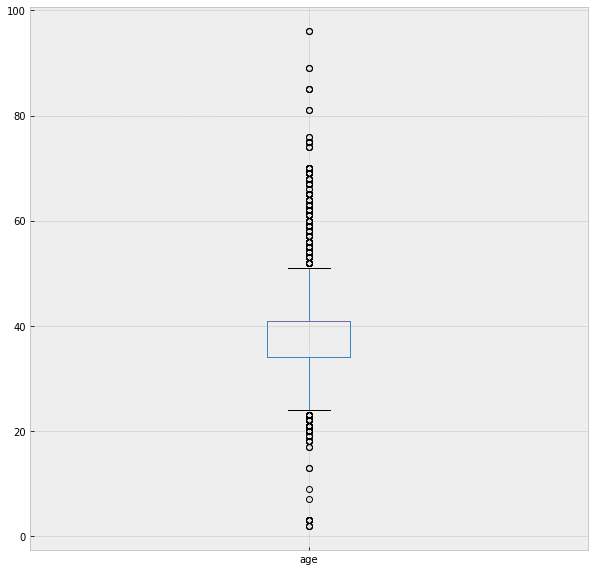

In [101]:
plt.figure(figsize = (10,10))
boxplot = df.boxplot()
plt.savefig('/content/drive/My Drive/COVID19/boxplot.png')

In [102]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    #print df[c].dtype
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings[c]
        df[c] = encodings[c].fit_transform(df[c])
print(encodings)

{'gender': LabelEncoder(), 'Region1 ': LabelEncoder(), 'Region2': LabelEncoder(), 'detected_state': LabelEncoder(), 'nationality': LabelEncoder(), 'Travel_hist': LabelEncoder(), 'Disease_hist': LabelEncoder(), 'Symptom': LabelEncoder(), 'Label': LabelEncoder()}


In [103]:
df.head()

,age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom,Label
0,23,0,17,16,1,1,24,2,3,0
1,41,0,11,12,18,1,24,1,3,0
2,21,0,46,40,22,1,24,2,2,0
3,55,1,58,50,7,3,30,0,2,1
4,41,0,24,21,21,1,24,0,1,1


In [104]:
X = df.iloc[:,0:9]
Y = df.iloc[:,9]
Y.head()

0    0
1    0
2    0
3    1
4    1
Name: Label, dtype: int64

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [106]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.03955581 0.01715433 0.07328548 0.08112559 0.05838841 0.00353026
 0.13375673 0.05923409 0.53396929]


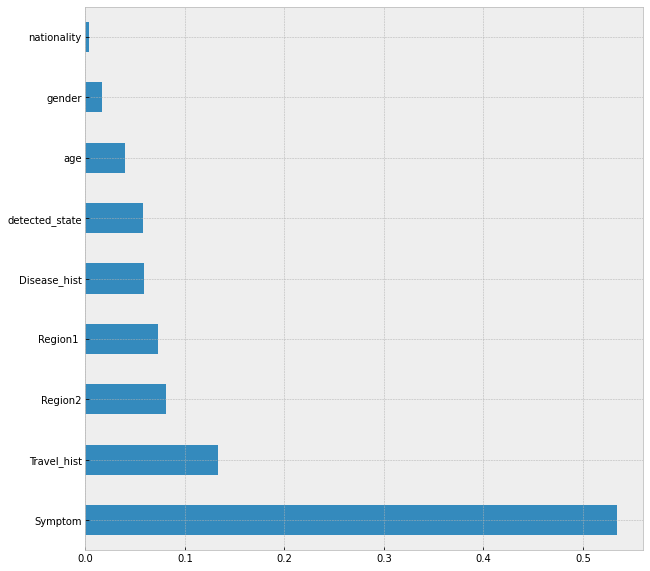

In [107]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))
feat_importances.nlargest(9).plot(kind='barh')
plt.savefig('/content/drive/My Drive/COVID19/imp.png')
plt.show()


In [0]:
from sklearn.preprocessing import StandardScaler #normalization
std = StandardScaler()
X = std.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)#random for splitting same data when run again.


Used Random Forest for classification as it fits better for this type of dataset which is based on conditions. 
I am trying different algorithms currently to the find the best one. Random Forest was my first try.

In [110]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestClassifier 

# create regressor object 
clf = RandomForestClassifier(n_estimators=50,criterion='gini',  
random_state=0)

# fit the regressor with x and y data 
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [111]:
y_pred = clf.predict(X_test) 
print(Counter(y_pred))
print(Counter(y_test))


Counter({1: 117, 0: 78})
Counter({1: 118, 0: 77})


In [112]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))
#0 : Negative (No coronavirus)
#1: Positive

Confusion Matrix :
[[ 77   0]
 [  1 117]]
Accuracy Score : 0.9948717948717949
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.99      1.00       118

    accuracy                           0.99       195
   macro avg       0.99      1.00      0.99       195
weighted avg       0.99      0.99      0.99       195



Testing the model with user's data

In [92]:
age=int(input("Enter your Age : "))
gender=input("Enter your Gender : ")
Region1=input("Enter your City : ")
Region2=input("Enter your District : ")
detected_state=input("Enter your State : ")
nationality=input("Enter your Nationality : ")
Travel_hist=input("Enter last City/Nation travelled : ")
Disease_hist=input("If you have BP/Diabetes, mention it : ")
Symptom=input("Mention present symptom of illness : ")
data=[[age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom]]
dfX = pd.DataFrame(data, columns = ['age','gender','Region1 ','Region2','detected_state','nationality','Travel_hist','Disease_hist','Symptom'])
for c in dfX.columns:
    #print df[c].dtype
    if dfX[c].dtype == "object":
        dfX[c] = encodings[c].transform(dfX[c])
X_test1 = std.transform(dfX)
y_pred1 = clf.predict(X_test1) 
ans = encodings['Label'].inverse_transform(y_pred1)
for dt in ans:
  if dt=='Positive':
    print("High chances of COVID-19")
  else:
    print("You are not suffering from COVID-19")

Enter your Age : 45
Enter your Gender : Male
Enter your City : Solapur
Enter your District : Solapur
Enter your State : Maharashtra
Enter your Nationality : India
Enter last City/Nation travelled : Italy
If you have BP/Diabetes, mention it : Null
Mention present symptom of illness : Null
High chances of COVID-19
